<a href="https://colab.research.google.com/github/dudgus1286/pandas/blob/main/matplotlib/12_%EC%82%B0%EC%A0%90%EB%8F%84_%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# matplotlib 한글 처리

!pip install koreanize_matplotlib

# 나눔 글꼴 설치
!apt -qq -y install fonts-nanum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.5 MB/s eta 0:00:00
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

In [5]:
for fpath in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
  fm.fontManager.addfont(fpath)

plt.rc("font",family='NanumBarunGothic')

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 산점도 그래프(scatter)

- x, y 상관관계를 나타낼 때 사용

In [7]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/data/student.csv")
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
0,채치수,북산고,197,90,85,100,95,85,Python
1,정대만,북산고,184,40,35,50,55,25,Java
2,송태섭,북산고,168,80,75,70,80,75,Javascript
3,서태웅,북산고,187,40,60,70,75,80,NaN
4,강백호,북산고,188,15,20,10,35,10,NaN
5,변덕규,능남고,202,80,100,95,85,80,C
6,황태산,능남고,188,55,65,45,40,35,PYTHON
7,윤대협,능남고,190,100,85,90,95,95,C#


#### 학년 컬럼 추가

In [8]:
df["학년"] = [3,3,2,1,1,3,2,2]
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,학년
0,채치수,북산고,197,90,85,100,95,85,Python,3
1,정대만,북산고,184,40,35,50,55,25,Java,3
2,송태섭,북산고,168,80,75,70,80,75,Javascript,2
3,서태웅,북산고,187,40,60,70,75,80,NaN,1
4,강백호,북산고,188,15,20,10,35,10,NaN,1
5,변덕규,능남고,202,80,100,95,85,80,C,3
6,황태산,능남고,188,55,65,45,40,35,PYTHON,2
7,윤대협,능남고,190,100,85,90,95,95,C#,2


#### 기본 scatter

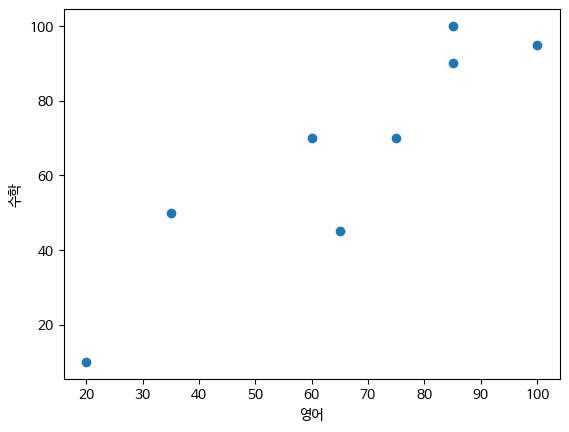

In [11]:
# x축과 y축 간의 관계 파악용

plt.scatter(df["영어"], df["수학"])
plt.xlabel("영어")
plt.ylabel("수학");

- 이 그래프의 목적은 영어 점수와 수학 점수가 관계가 있느냐 이런 걸 보고 싶은 것

#### 원 크기 변경 - 랜덤 값 이용

In [14]:
import numpy as np

np.random.seed(42)

sizes = np.random.rand(8) * 1000
sizes

array([374.54011885, 950.71430641, 731.99394181, 598.6584842 ,
       156.01864044, 155.99452034,  58.08361217, 866.17614577])

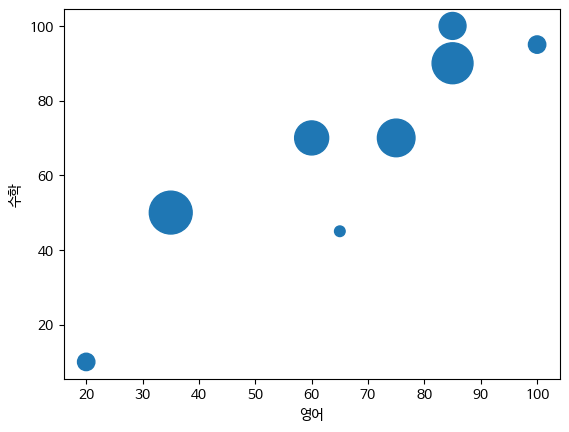

In [15]:
plt.scatter(df["영어"], df["수학"], s=sizes)
plt.xlabel("영어")
plt.ylabel("수학");

#### 원 크기 변경 - 학년 값 이용

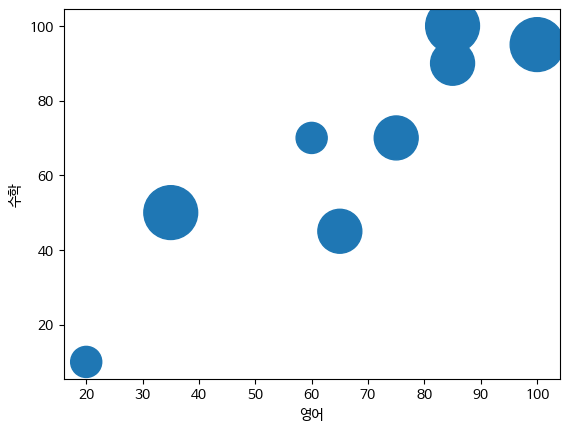

In [16]:
sizes = df["학년"] * 500
plt.scatter(df["영어"], df["수학"], s=sizes)
plt.xlabel("영어")
plt.ylabel("수학");

#### 색상 변경

#### cmap (https://matplotlib.org/stable/tutorials/colors/colormaps.html)

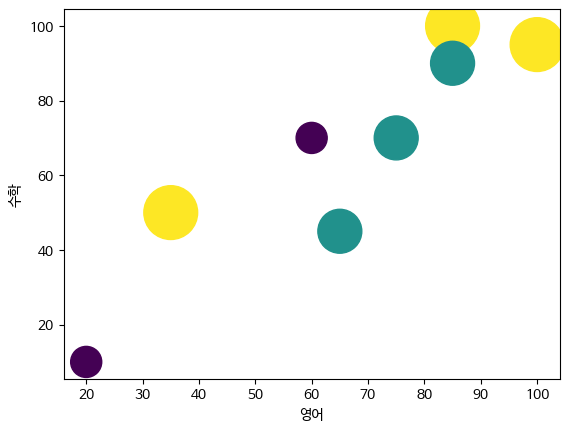

In [18]:
# cmap = 색상 맵(상단 링크 참조)
# c = 색상을 구별할 기준

plt.scatter(df["영어"], df["수학"], s=sizes, cmap = 'viridis', c=df["학년"])
plt.xlabel("영어")
plt.ylabel("수학");

#### alpha : 투명

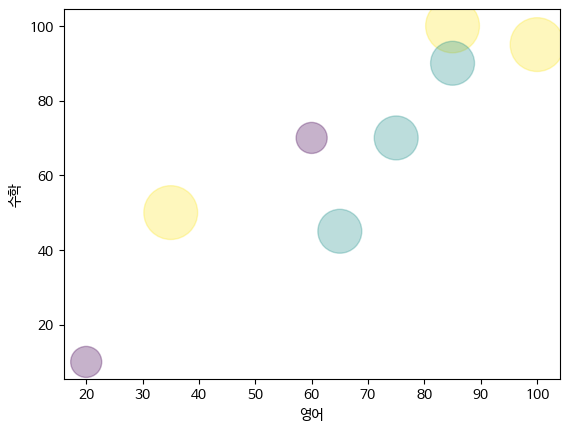

In [19]:
plt.scatter(df["영어"], df["수학"], s=sizes, cmap = 'viridis', c=df["학년"], alpha=0.3)
plt.xlabel("영어")
plt.ylabel("수학");

#### colorbar()

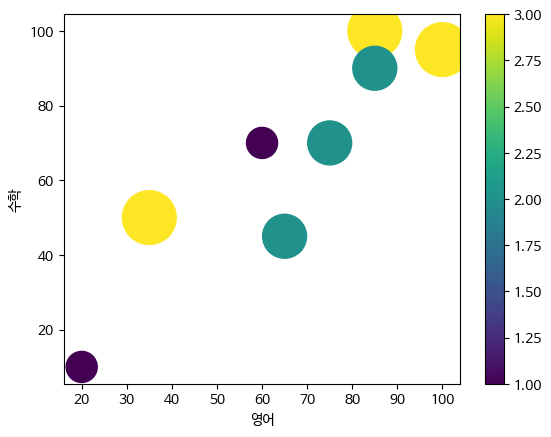

In [21]:
plt.scatter(df["영어"], df["수학"], s=sizes, cmap = 'viridis', c=df["학년"])
plt.xlabel("영어")
plt.ylabel("수학")
plt.colorbar();

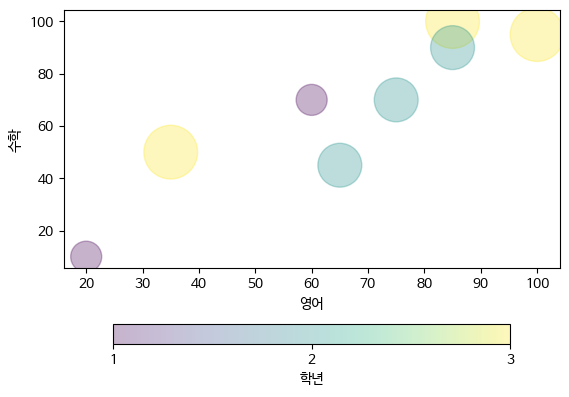

In [22]:
plt.scatter(df["영어"], df["수학"], s=sizes, cmap = 'viridis', c=df["학년"], alpha = 0.3)
plt.xlabel("영어")
plt.ylabel("수학")
plt.colorbar(ticks=[1,2,3], label="학년", shrink=0.8, orientation="horizontal");

- ticks : 기본으로 나오는 눈금 대신 다른 것 지정
- label : 컬러바 라벨 지정
- shrink : 컬러바 길이 지정
- horizontal : 컬러바 위치(가로)